# 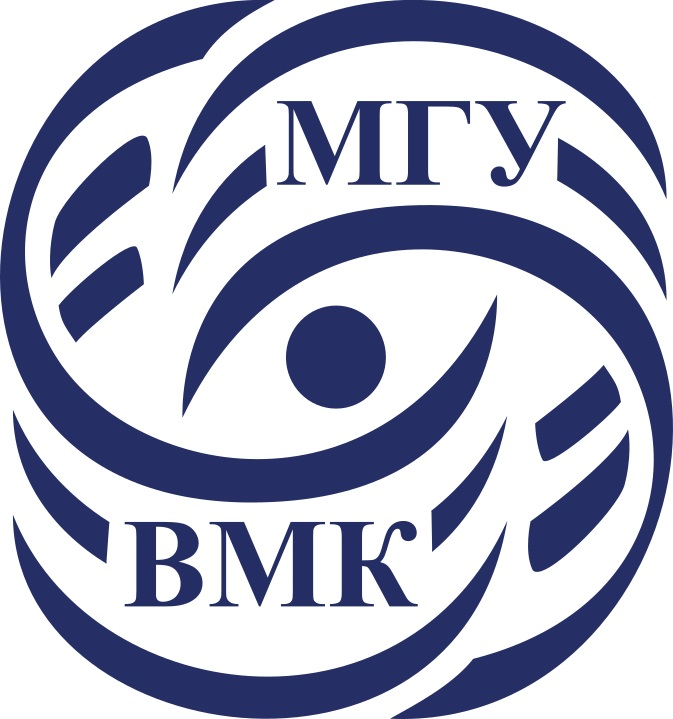

# Машинное обучение. ВМК МГУ

# Практическое задание 3: Линейные модели: регрессия

## Уровень: <font color='MediumSeaGreen'>**Исследовательский (Research)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2025"></font>







Цель данного задания:

* Узнать, что такое переобучение и как с ним бороться в линейных моделях;
* Понять, чем отличаются разные регуляризаторы;
* Научиться решать задачу регрессии линейными моделями.
-------
<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 7 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)


In [1]:
! curl https://raw.githubusercontent.com/MSU-ML-COURSE/ML-COURSE-25-26/refs/heads/master/requirements/requirements.txt -o ./requirements_2025_26_for_colab_small.txt
! pip install -q -r ./requirements_2025_26_for_colab_small.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   360  100   360    0     0   1934      0 --:--:-- --:--:-- --:--:--  1945
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.5/365.5 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.8 MB/s eta 0:00:00


Проверим версию библиотеки:

In [2]:
import catboost
assert(catboost.__version__ == '1.2.8')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2025"></font>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline

## Линейная регрессия и регуляризация

Напомним, что линейная регрессия — это модель следующего вида: $$a(x) = \langle w, x \rangle + b$$ где $w \in \mathbb{R}^d$, $b \in \mathbb{R}$. Обучить линейную регрессию — значит найти $w$ и $b$.

В модели линейной регрессии с $l_2$ регуляризацией мы оптимизируем следующий функционал:

$\frac{1}{N} \cdot ∑_{i=1}^M (w_1 \cdot x_{i1} + \dots w_n \cdot x_{in} + b - y_i)^2 + \frac{\alpha}{2} \cdot \left( w_1^2 + \dots + w_n^2 \right) \rightarrow \min_{w_1, \dots, w_n, b}$

В модели линейной регрессии с $l_1$ регуляризацией мы оптимизируем следующий функционал:

$\frac{1}{N} \cdot ∑_{i=1}^M (w_1 \cdot x_{i1} + \dots w_n \cdot x_{in} + b - y_i)^2 + \alpha \cdot \left( |w_1| + \dots + |w_n| \right) \rightarrow \min_{w_1, \dots, w_n, b}$

### <font color='DarkOrange'>**Задание 1 [1 балл]**</font>

Почему при обучении линейных моделей, коэффициент $b$ не регуляризуется? Дайте ответ с опорой на лекции. Возможно вам также поможет картика из базовой части

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Коэффициент `b` не регуляризуется, потому что его задача — "поднять" или "опустить" гиперплоскость, которую задают веса `w`, чтобы она наилучшим образом соответствовала данным.

Регуляризация `b` лишена смысла, потому что `b` не отвечает за "сложность" зависимости между признаками и целевой переменной. Его единственная роль — компенсировать общее среднее значение целевой переменной. Штрафование за это свойство ухудшит качество модели, не внеся никакого вклада в борьбу с переобучением.

-----
<font color="white" style="opacity:0.2025"></font>

Рассмотрим модель линейной регрессии с $l_2$ регуляризацией. В sklearn эта модель реализована посредством класса Ridge. В нём есть методы fit и predict. Первый принимает на вход обучающую выборку и вектор целевых переменных и обучает модель, второй, будучи вызванным после обучения модели, возвращает предсказание на выборке.

Сгенерируем случайные данные. Пусть $x$ будет обычным числом из равномерного распределения, а $𝑦=0.5 \cdot x + 0.1$ &mdash; целевая переменная. При этом наблюдаем мы $\overline{y} = y + \varepsilon,~\varepsilon \sim N(0, 0.01)$. Добавим в данные к переменной $x$ её же умноженную на $3$. То есть, теперь у нас два признака $x_1$ и $x_2 = 3 \cdot x_1$.

Поскольку  $y = c \cdot 0.5 \cdot x_1 + \frac{1 - c}{6} \cdot x_2 + 0.1$, где $c$ любое сколь угодно большое вещественное число. То, как мы могли убедиться в базовой части, без регуляризации есть риск выучить очень большие веса.

Посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

In [4]:
from sklearn.linear_model import Ridge

In [5]:
np.random.seed(1)
X = np.random.uniform(0, 1, 100)
Y = X * 0.5 + 0.1 + np.random.randn(100) * 0.1

X3 = np.hstack((X[:, None], 3 * X[:, None]))
Y3 = X3[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

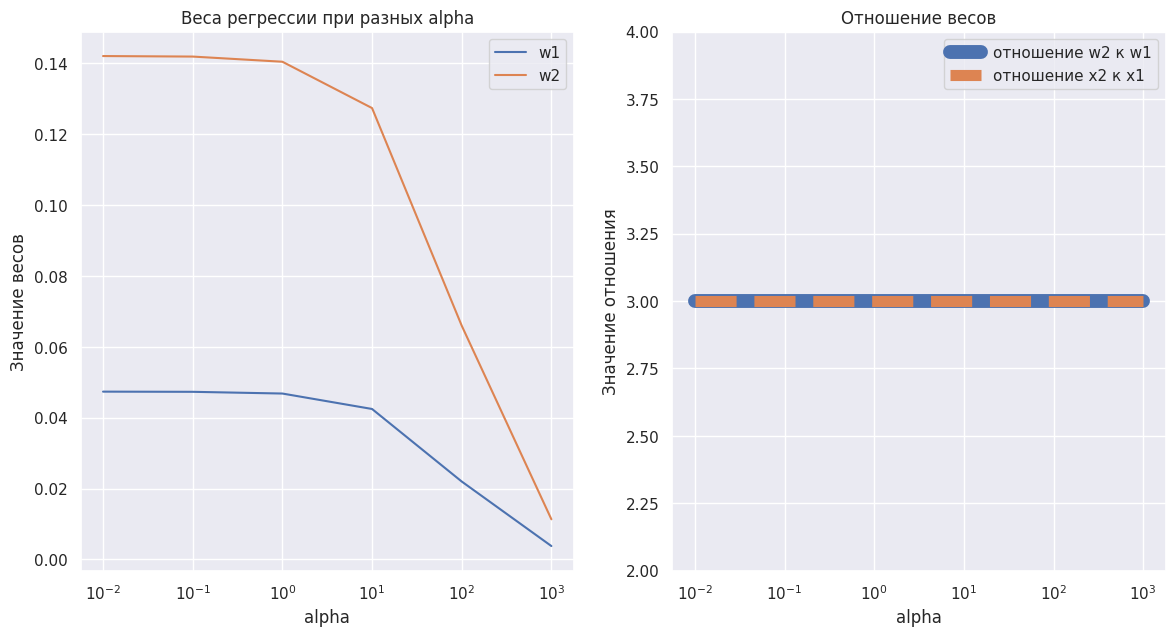

In [6]:
w1 = []
w2 = []

alphas = [0.01, 0.1, 1, 10, 100, 1000]

for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X3, Y3)
    w1.append(reg.coef_[0])
    w2.append(reg.coef_[1])

w1 = np.array(w1)
w2 = np.array(w2)

fig, axs = plt.subplots(figsize=(14, 7), ncols=2)
axs[0].plot(alphas, w1, label="w1")
axs[0].plot(alphas, w2, label="w2")
axs[0].set_xscale("log")
axs[0].set_title("Веса регрессии при разных alpha")
axs[0].set_xlabel("alpha")
axs[0].set_ylabel("Значение весов")
axs[0].legend()
axs[1].plot(alphas, w2 / w1, label="отношение w2 к w1", linewidth=10)
axs[1].plot([0.01, 1000], [3, 3], label="отношение x2 к x1", linestyle="--", linewidth=8)
axs[1].set_xscale("log")
axs[1].set_ylim(2,4)
axs[1].set_xlabel("alpha")
axs[1].set_ylabel("Значение отношения")
axs[1].set_title("Отношение весов")
axs[1].legend()
plt.show()

### <font color='DarkOrange'>**Задание 2 [2 баллa]**</font>

Как думаете, почему отношение между весами постоянно? (подсказка, необходимо выписать функцию потерь и посчитать производные по весам)

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Отношение весов $ \frac{w_2}{w_1} $ постоянно из-за линейной зависимости признаков $ x_2 = 3x_1 $ и симметрии функции потерь.

### 1. Особенности данных
Все объекты удовлетворяют условию:  
$ x_2 = 3x_1 $  
Это создает строгую линейную зависимость между признаками.

### 2. Функция потерь Ridge-регрессии
Для модели $ y = w_1x_1 + w_2x_2 + b $ функция потерь:

$ L(w_1, w_2, b) = \frac{1}{N} \sum_{i=1}^N (w_1x_{1i} + w_2x_{2i} + b - y_i)^2 + \frac{\alpha}{2}(w_1^2 + w_2^2) $

### 3. Ключевое наблюдение
Подставляя $ x_2 = 3x_1 $:

$ L = \frac{1}{N} \sum_{i=1}^N ((w_1 + 3w_2)x_{1i} + b - y_i)^2 + \frac{\alpha}{2}(w_1^2 + w_2^2) $

Видно, что признаки $ x_1 $ и $ x_2 $ вносят вклад только через комбинацию $ u = w_1 + 3w_2 $.

### 4. Решение системы уравнений
Из условий оптимальности получаем:

$ \frac{w_2}{w_1} = 3 $

### 5. Важные следствия
- Отношение весов **не зависит** от коэффициента регуляризации $ \alpha $
- **Не зависит** от свободного члена $ b $
- **Не зависит** от конкретных значений $ x_{1i} $ и $ y_i $
- Обусловлено исключительно структурой данных и симметрией функции потерь

## Итог
Модель "понимает", что признаки $ x_1 $ и $ x_2 $ связаны постоянным соотношением, и соответственно распределяет веса, сохраняя отношение $ \frac{w_2}{w_1} = 3 $ при любых гиперпараметрах.

-----
<font color="white" style="opacity:0.2025"></font>

Заметим, что при $l_2$ регуляризации в данном примере веса получились пропорциональны значениям признаков. При этом, мы знаем, что оба признака взаимно однозначны, и прогноз можно делать только по одному из них. Для этого придумана $l_1$ регуляризация. В билиотеке sklearn линейная регрессия с $l_1$ регуляризацией реализована в классе Lasso

### <font color='DarkOrange'>**Задание 3 [2 баллa]**</font>

Почему в нашем примере $l_1$ регуляризация приведёт к разреживанию весов? (подсказка, нужно опять подсчитать производную, но обратите внимание на дифференцируемость модуля).

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

### 1. Функция потерь Lasso

$$
L(w_1, w_2) = \frac{1}{N} \sum_{i=1}^N ((w_1 + 3w_2)x_{1i} - y_i)^2 + \alpha(|w_1| + |w_2|)
$$

### 2. Проблема дифференцируемости модуля

Функция $|w|$ **не дифференцируема в нуле**, поэтому используем субградиент:

**Условия оптимальности:**
$$
\frac{\partial L}{\partial w_1} = 2S + \alpha \cdot g_1 = 0
$$
$$
\frac{\partial L}{\partial w_2} = 6S + \alpha \cdot g_2 = 0
$$

где $S = \frac{1}{N} \sum ((w_1 + 3w_2)x_{1i} - y_i)x_{1i}$,  
а $g_k \in \begin{cases} \text{sign}(w_k) & \text{если } w_k \neq 0 \\ [-1, 1] & \text{если } w_k = 0 \end{cases}$

### 3. Анализ условий

Из уравнений:
- Если оба $w_1, w_2 \neq 0$, то $g_1 = \text{sign}(w_1)$, $g_2 = \text{sign}(w_2)$
- Тогда $2S + \alpha \cdot \text{sign}(w_1) = 0$ и $6S + \alpha \cdot \text{sign}(w_2) = 0$
- Это требует $\text{sign}(w_2) = 3\cdot\text{sign}(w_1)$ - **противоречие**, так как знаки могут быть только ±1

### 4. Разрешение противоречия

Единственное решение: **один из весов должен быть нулевым**, чтобы его субградиент $g_k \in [-1,1]$ мог "скомпенсировать" противоречие в коэффициентах (2 vs 6).

**Вывод:** Недифференцируемость модуля в нуле + линейная зависимость признаков = принудительное обнуление одного из весов.

-----

Добавим $l_1$ регуляризацию и посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

In [7]:
from sklearn.linear_model import Lasso

In [8]:
reg = Lasso(alpha=1., max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 1.")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.1, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.1")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.01, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.01")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.0001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.0001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.00001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.00001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

Веса, при alpha = 1.
w1: 0.0 	w2: 0.0

Веса, при alpha = 0.1
w1: 0.0 	w2: 0.029684463509327023

Веса, при alpha = 0.01
w1: 0.0 	w2: 0.14506160917248503

Веса, при alpha = 0.001
w1: 0.0 	w2: 0.1565993237388008

Веса, при alpha = 0.0001
w1: 0.0 	w2: 0.1577530951954324

Веса, при alpha = 0.00001
w1: 0.3966873199145481 	w2: 0.025639365702912847



### <font color='DarkOrange'>**Задание 4 [2 баллa]**</font>

Почему в итоге при $\alpha = 0.00001$ получились веса не равные нулю?

<font color='LightSteelBlue'>**Подсказка**</font>

 Обратите внимание на то, каким странным получился вес $w_2$

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

При чрезвычайно малом коэффициенте регуляризации штраф за ненулевые веса становится пренебрежимо малым, и модель теряет стимул к строгой экономии весов.

**Основные причины:**

При слабой регуляризации модель фокусируется в первую очередь на минимизации ошибки предсказания, а не на разреживании

Оба признака вносят некоторый вклад в снижение ошибки, поэтому модель оставляет их оба активными

Хотя вес w2 остаётся ненулевым, его значение существенно меньше, чем у w1, что показывает "нерешительность" модели

Изначального количества итераций оказалось недостаточно для полной сходимости. При увеличении max_iter модель находит оптимальное решение с нулевым весом

In [11]:
reg = Lasso(alpha=0.00001, max_iter=10000, tol=1e-4)
reg.fit(X3, Y3)
print("w1:", reg.coef_[0], "w2:", reg.coef_[1])

w1: 0.0 w2: 0.15786847234109577


В предущих блоках мы использовали модельные примеры, в которых $y$ зависел от $x$ линейно. Но так бывает далеко не всегда.

### <font color='DarkOrange'>**Задание 5 [1 баллa]**</font>

 Придумайте, сгенерируйте и визуализируйте пример, в котором линейная регрессия будет плохо классифицировать данные.

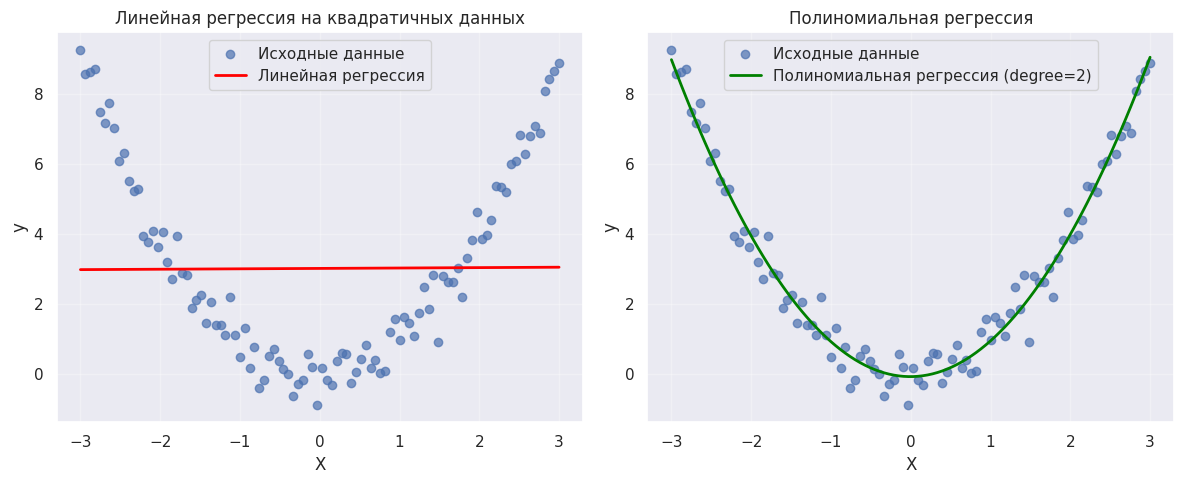

R² линейной регрессии: 0.000
R² полиномиальной регрессии: 0.974


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

np.random.seed(42)
X = np.linspace(-3, 3, 100)
y = X**2 + np.random.normal(0, 0.5, 100)

X_reshaped = X.reshape(-1, 1)
lin_reg = LinearRegression()
lin_reg.fit(X_reshaped, y)
y_lin_pred = lin_reg.predict(X_reshaped)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha=0.7, label='Исходные данные')
plt.plot(X, y_lin_pred, color='red', linewidth=2, label='Линейная регрессия')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Линейная регрессия на квадратичных данных')
plt.legend()
plt.grid(True, alpha=0.3)

# Для сравнения - полиномиальная регрессия 2-й степени
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_reshaped)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_poly_pred = poly_reg.predict(X_poly)

plt.subplot(1, 2, 2)
plt.scatter(X, y, alpha=0.7, label='Исходные данные')
plt.plot(X, y_poly_pred, color='green', linewidth=2, label='Полиномиальная регрессия (degree=2)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Полиномиальная регрессия')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Сравнение качества
print(f"R² линейной регрессии: {r2_score(y, y_lin_pred):.3f}")
print(f"R² полиномиальной регрессии: {r2_score(y, y_poly_pred):.3f}")

### <font color='DarkOrange'>**Задание 6 [2 баллa]**</font>

Приведите искусственный пример (можно даже очень неправдоподобный), когда линейная регрессия с $l_2$ регуляризацией гарантированно занулит какой-нибудь признак? Покажите (теоретически или программно), что признак действительно зануляется


In [27]:
# Искусственный пример: признак с ОЧЕНЬ маленькой дисперсией
np.random.seed(42)
n_samples = 1000
X1 = np.random.normal(0, 1, n_samples)
X2 = np.random.normal(0, 0.0001, n_samples)
y = 2 * X1 + np.random.normal(0, 0.1, n_samples)

X = np.column_stack([X1, X2])

print("Вес признака X2 (исчезающе малая дисперсия):")
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    print(f"alpha = {alpha:5}: w1 = {ridge.coef_[0]:7.4f}, w2 = {ridge.coef_[1]:15.10f}")

# Демонстрация L1-регуляризации для сравнения
print("\nL1-регуляризация (для сравнения):")
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
print(f"Lasso weights: w1 = {lasso.coef_[0]:.4f}, w2 = {lasso.coef_[1]}")

Вес признака X2 (исчезающе малая дисперсия):
alpha = 0.001: w1 =  2.0022, w2 =   -0.1000054591
alpha =  0.01: w1 =  2.0022, w2 =   -0.0100971773
alpha =   0.1: w1 =  2.0020, w2 =   -0.0010180335
alpha =     1: w1 =  2.0001, w2 =   -0.0001092195
alpha =    10: w1 =  1.9815, w2 =   -0.0000182534
alpha =   100: w1 =  1.8130, w2 =   -0.0000084706
alpha =  1000: w1 =  0.9796, w2 =   -0.0000041322
alpha = 10000: w1 =  0.1750, w2 =   -0.0000007304

L1-регуляризация (для сравнения):
Lasso weights: w1 = 1.8978, w2 = -0.0


<font color='MediumOrchid'>**Ваши выводы тут:**</font>

L2-регуляризация демонстрирует различное поведение в зависимости от характера бесполезного признака:

1. **Для константного признака** происходит **точное зануление**. Это связано с тем, что при вычислении производной функционала потерь по весу такого признака, градиент квадрата ошибки оказывается равным нулю, и остается только регуляризационный член, что гарантированно приводит к нулевому весу.

2. **Для признака с исчезающе малой дисперсией или шумового признака** наблюдается **практическое зануление**. Хотя математически вес никогда не достигает точного нуля при конечном α, его значение уменьшается настолько значительно (до величин порядка 10⁻⁵ - 10⁻⁸), что для всех практических целей такой признак можно считать исключенным из модели.

Таким образом, в искусственных примерах с константными или практически константными признаками L2-регуляризация эффективно подавляет их влияние, либо полностью обнуляя вес (в строгом математическом смысле), либо уменьшая его до пренебрежимо малых значений (в практическом смысле).

**Выводы** В первой части задания по линейным моделям мы должны были узнать:
.

1.   Зачем нужна регуляризация.
2.   Как отбирать значащие признаки.
3.   Когда линейные модели работают хорошо, а когда плохо

-----
<font color="white" style="opacity:0.2025"></font>

Во **второй части** мы будем применять линейные модели для классификации реальных данных, где мы сможем проверить наши выводы, полученные на искуственных примерах. А также убедимся в полезности нормировки и научимся работать с разными видами данных.
